In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import normalize

df = pd.read_csv('kc_house_data.csv')
# df = df.apply(preprocessing.LabelEncoder().fit_transform)
# I remove id and date becuase they are only identifiers.
df = df.drop(['id', 'date'], axis=1)

le = preprocessing.LabelEncoder()
df['zipcode'] = le.fit_transform(df['zipcode'])

zipcode         -0.050889
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


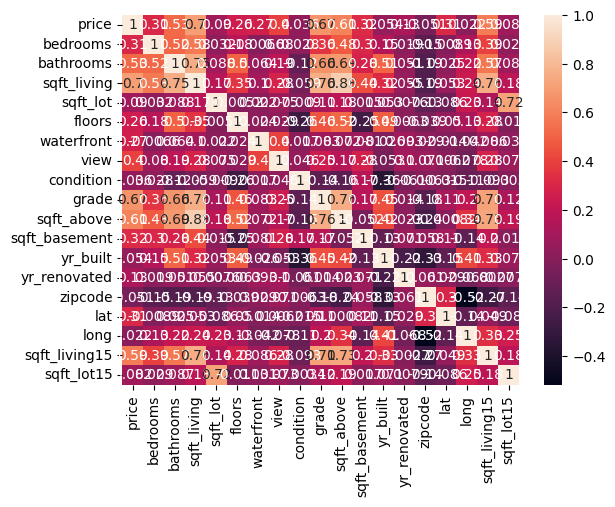

In [327]:
dfCorr = df.corr()
# Sort and print all correlation of all features with price.
print((dfCorr.sort_values('price')['price']))
avgDic = {}
for col in df.columns:
    avgDic[col] = np.average(dfCorr[col])
p1 = sns.heatmap(df.corr(), annot=True)

# Saved sorted dictionary of correlation average.
sorted_tuples = sorted(avgDic.items(), key=lambda item: item[1])
sorted_dict = {k: v for k, v in sorted_tuples}

df = df.drop('zipcode', axis=1)
df = df.drop('long', axis=1)
df = df.drop('condition', axis=1)
df = df.drop('yr_built', axis=1)
df = df.drop('sqft_lot15', axis=1)
df = df.drop('sqft_lot', axis=1)
df = df.drop('yr_renovated', axis=1)
# Kept removing features one by one until I don't see the rmse and r2 value stop increasing.

# This is the sorted correlation value ralated to price.
# zipcode         -0.050889
# long             0.021626
# condition        0.036362
# yr_built         0.054012
# sqft_lot15       0.082447
# sqft_lot         0.089661
# yr_renovated     0.126434
# floors           0.256794
# waterfront       0.266369
# lat              0.307003
# bedrooms         0.308350
# sqft_basement    0.323816
# view             0.397293
# bathrooms        0.525138
# sqft_living15    0.585379
# sqft_above       0.605567
# grade            0.667434
# sqft_living      0.702035
# price            1.000000

In [328]:
# print(df)
# for col in df.columns:
#     df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())
# print(df)


In [329]:
Y = df['price']
X = df.drop('price', axis=1)

# Split data 90% for training and 10% for testing. 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

In [330]:
# I use LinearRegression to fit my x and y data to train.
model = LinearRegression().fit(x_train,y_train)

# Then I predict, and calculate the scores with the testing data.
predict = model.predict(x_test)
score = model.score(x_test, y_test)
rmse = mean_squared_error(y_test, predict, squared=False)
r2 = r2_score(y_test, predict)

print('rmse: ', rmse, ', r2', r2)

# No shuffle when spliting data
# rmse:  209813.98524734663 , r2 0.6825796189342549

# Highest result I get when I left shuffle on
# rmse:  215121.57821969816 , r2 0.6993215181523555


rmse:  215121.57821969816 , r2 0.6993215181523555
